# Assignment to ION Energy's Question for Data Analyst Position

In [1]:
#import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set()

### Loading of Dataset

In [2]:
df = pd.read_csv("Assignment file for Data Analyst - assignment file.csv")
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


First we will add new column converting timestamp to datetime

In [3]:
df["Datetime"] = pd.to_datetime(df["Timestamp"], unit='ms')
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption,Datetime
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0,2019-05-01 09:00:15
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0,2019-05-01 09:16:55
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0,2019-05-01 09:33:35
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0,2019-05-01 09:50:15
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0,2019-05-01 10:06:55


### Understanding of the dataset

Current : Current drawn from the battery<br>
Total Voltage : Voltage difference accross battery<br>
SOC : State of Charge of the battery<br>
Temperature : temperature of the battery over the period<br>
SOH : State of Health of battery<br>
Equivalent Cycle : cycle of charging<br>
Application Status : status of application battery installed for<br>
Grid Status : binary valued status of grid<br>
Grid Power : power of grid<br>
Grid energy consumption : instanteous value of energy consumption of grid<br>
Grid cumulative energy consumption : calculated cumulative sum of grid energy consumption<br>

Lets first get an understanding of data.

In [4]:
df.describe()
df.dtypes

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,3.110400e+04,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,1.572253e+12,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,8.979096e+09,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,1.556701e+12,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.564477e+12,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,1.572253e+12,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,1.580028e+12,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,1.587804e+12,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


Timestamp                                      int64
Current                                        int64
Total voltage                                float64
SOC                                          float64
Temperature                                  float64
SOH                                          float64
Equivalent cycle                             float64
Application status                             int64
Grid status                                    int64
Grid power                                   float64
Grid energy consumption                      float64
Grid cumulative energy consumption           float64
Datetime                              datetime64[ns]
dtype: object

# PAIR1: Grid status & SOC(State of Charge) correlation

In [5]:
pair1 = ["Grid status", "SOC"]
pair1_data = df[pair1]
pair1_data.head()

,Grid status,SOC
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0


### Before going for correlation of the pairs lets first prepare the line plots of those with respect to time

[Text(0, 0.5, 'Grid Status & SOC'),
 Text(0.5, 0, 'Datetime(day/month)'),
 Text(0.5, 1.0, 'Grid Status vs SOC over time')]

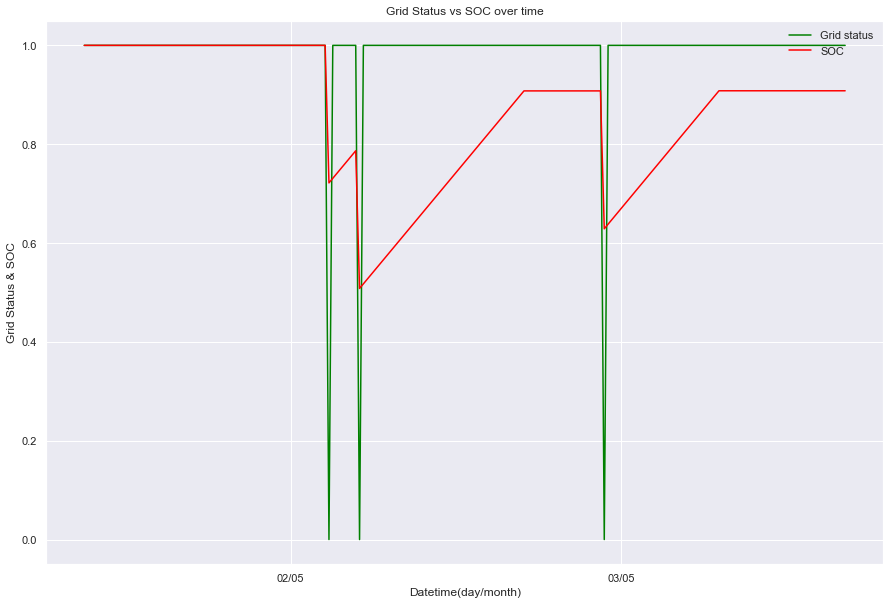

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
start,end = 0,200
ax.plot(df[start:end]["Datetime"].values, df[start:end]["Grid status"], color="green", label="Grid status")
ax.plot(df[start:end]["Datetime"].values, df[start:end]["SOC"], color="red", label="SOC")
ax.set(xlabel="Datetime(day/month)",
      ylabel="Grid Status & SOC",
      Title="Grid Status vs SOC over time")

ax.legend(loc="upper right")
# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m"))

### Looking at the first 100 values shows SOC of battery being perfect 100% for first 63 points and then decrease in its value drops Grid Status. Then for further charging of battery the SOC doesn't regain completely but about 90% is regained back and continues doing it.

[Text(0, 0.5, 'Grid Status & SOC'),
 Text(0.5, 0, 'Datetime(month/year)'),
 Text(0.5, 1.0, 'Grid Status vs SOC over time')]

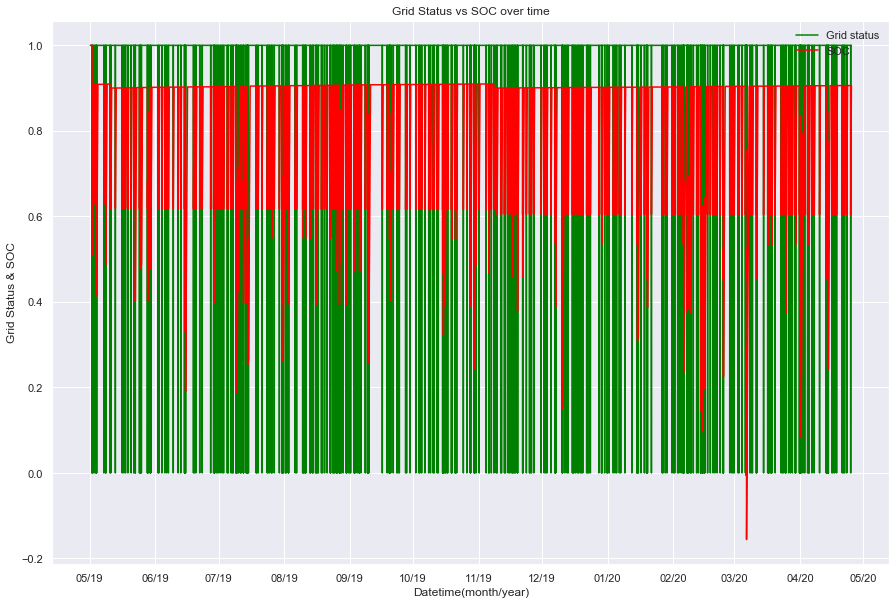

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
start,end = 0,-1
ax.plot(df[start:end]["Datetime"].values, df[start:end]["Grid status"], color="green", label="Grid status")
ax.plot(df[start:end]["Datetime"].values, df[start:end]["SOC"], color="red", label="SOC")
ax.set(xlabel="Datetime(month/year)",
      ylabel="Grid Status & SOC",
      Title="Grid Status vs SOC over time")

ax.legend(loc="upper right")
# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m/%y"))

In [8]:
fig.savefig("SOC vs Grid status-lineplot.png")

### Above plot clearly tells us about the SOC remains in between 0.9 and 0.6 for most cases whenever the Grid status drops and rise again.

### Now lets look at the correlation coefficients
Grid status is binary valued between 0 and 1 whereas SOC is real between 0.0 and 1.0. So computed value is point biserial correlation coefficient.

In [9]:
pair1_corr = pair1_data.corr()
print(pair1_corr)

             Grid status       SOC
Grid status     1.000000  0.227947
SOC             0.227947  1.000000


### Correlation coefficient of 0.228 signifies a weak positive correlation between SOC and Grid status. So SOC does change Grid status but with a small amount.

### Lets visualize it with Heatmap

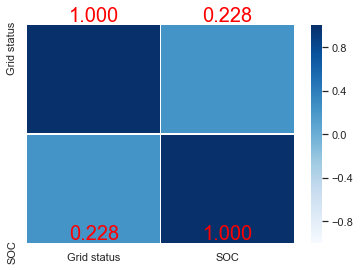

In [10]:
pair1_visualisation = sns.heatmap(pair1_corr,
                                  cbar=True, fmt='.3f', 
                                  annot_kws={'size': 20, 'ha':'center', 'va': 'bottom', 'color':'red'},
                                  xticklabels = pair1_corr.columns,
                                  yticklabels = pair1_corr.columns,
                                  center=0.0, vmin = -1,vmax = 1,
                                  linewidth=0.5,robust=True,
                                  annot=pair1_corr.values,cmap='Blues')

### Saving pair1 visualisation to png

In [11]:
pair1_fig = pair1_visualisation.get_figure()
pair1_fig.savefig("pair1_corr_fig.png")

# PAIR2: Equivalent Cycles & SOH(State of Health) correlation

Similar to previous one lets start with line plot first

In [12]:
pair2 = ["Equivalent cycle", "SOH"]
pair2_data = df[pair2]
pair2_data.head()

,Equivalent cycle,SOH
0,0.0,1.000000
1,0.0,0.999774
2,0.0,0.999679
3,0.0,0.999606
4,0.0,0.999542


[Text(0, 0.5, 'Equivalent cycles & SOH'),
 Text(0.5, 0, 'Datetime(month/year)'),
 Text(0.5, 1.0, 'Equivalent Cycles vs SOH over time')]

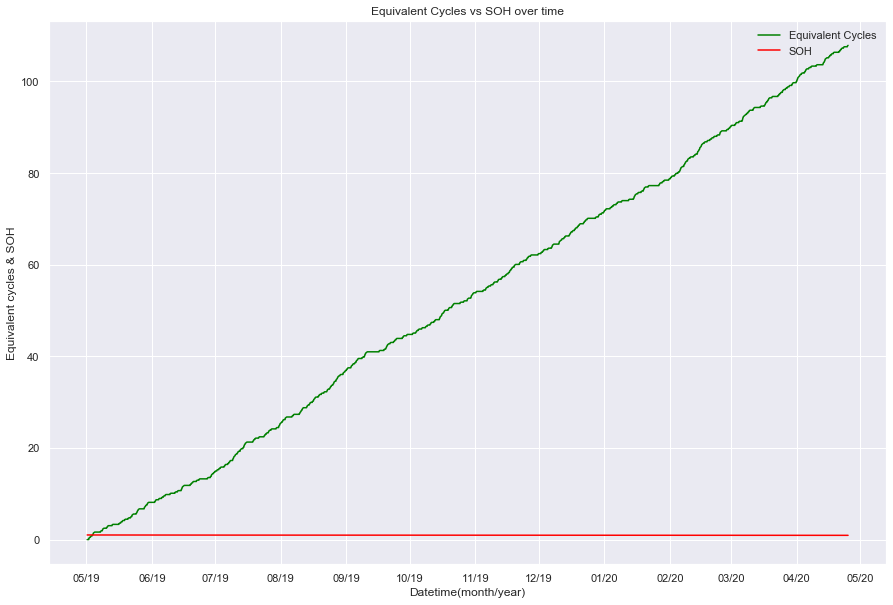

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
start,end = 0,-1
ax.plot(df[start:end]["Datetime"].values, df[start:end]["Equivalent cycle"], color="green", label="Equivalent Cycles")
ax.plot(df[start:end]["Datetime"].values, df[start:end]["SOH"], color="red", label="SOH")
ax.set(xlabel="Datetime(month/year)",
      ylabel="Equivalent cycles & SOH",
      Title="Equivalent Cycles vs SOH over time")

ax.legend(loc="upper right")
# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m/%y"))

In [14]:
fig.savefig("SOH vs Equivalent Cycles-lineplot.png")

### From the above plot its quite evident that increase in equivalent cycles doesn't change state of health(SOH) of battery much. This signifies the quality of battery being very good.

In [15]:
pair2_corr = pair2_data.corr()
pair2_corr.head()

,Equivalent cycle,SOH
Equivalent cycle,1.000000,-0.984262
SOH,-0.984262,1.000000


### As expected the correlation coefficient is very close to -1 signifying negative impact of recharging cycles on battery's health.

Lets visualize the correlation coefficient heatmap

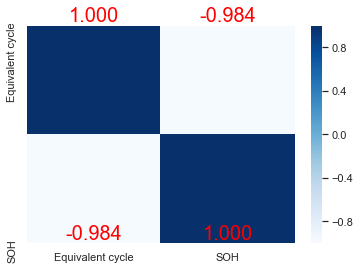

In [16]:
pair2_visualisation = sns.heatmap(pair2_corr,
                                 cbar=True, fmt='.3f',
                                 annot_kws={'size': 20, 'ha':'center', 'va': 'bottom', 'color':'red'},
                                 xticklabels=pair2_corr.columns,
                                 yticklabels=pair2_corr.columns,
                                 center=0.0, vmin = -1, vmax = 1,
                                 robust=True, cmap="Blues",
                                 annot=True)

### Saving pair2 visualisation to png

In [17]:
pair2_fig = pair2_visualisation.get_figure()
pair2_fig.savefig("pair2_corr_fig.png")

# PAIR3: SOC(State of Charge) & Temperature correlation

In [18]:
pair3 = ["SOC", "Temperature"]
pair3_data = df[pair3]
pair3_data.head()

,SOC,Temperature
0,1.0,25.229167
1,1.0,25.528210
2,1.0,25.859735
3,1.0,26.204830
4,1.0,26.553448


### Preparing the lineplot

[Text(0, 0.5, 'Temperature & SOC'),
 Text(0.5, 0, 'Datetime'),
 Text(0.5, 1.0, 'Temperature vs SOC over time')]

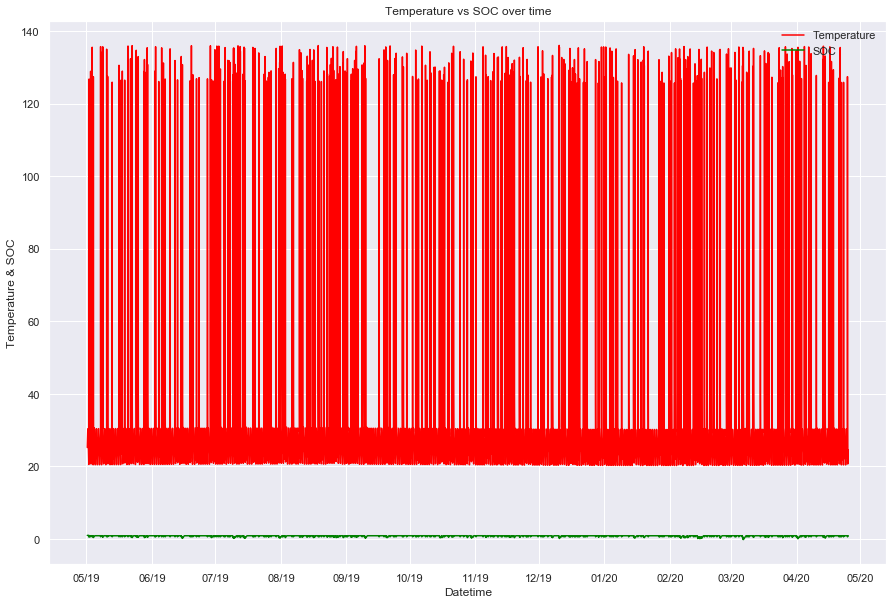

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
start,end = 0,-1
ax.plot(df[start:end]["Datetime"].values, df[start:end]["Temperature"], color="red", label="Temperature")
ax.plot(df[start:end]["Datetime"].values, df[start:end]["SOC"], color="green", label="SOC")
ax.set(xlabel="Datetime",
      ylabel="Temperature & SOC",
      Title="Temperature vs SOC over time")

ax.legend(loc="upper right")
# Clean up the x axis dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m/%y"))

In [20]:
fig.savefig("Temperature vs SOC-lineplot.png")

### Above plot clearly suggested not much change in SOC with respect to varience in temperature. Going for the correlation coefficient.

In [21]:
pair3_corr = pair3_data.corr()
pair3_corr.head()

,SOC,Temperature
SOC,1.00000,-0.36904
Temperature,-0.36904,1.00000


### As expected the coefficient of -0.37 suggest weak negative relation between SOC and temperature.

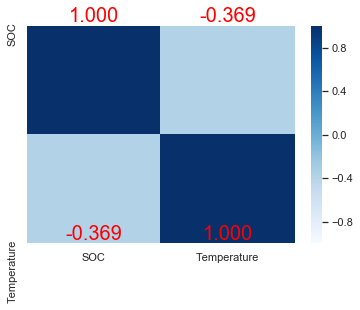

In [22]:
pair3_visualisation = sns.heatmap(pair3_corr,
                                 cbar=True, fmt='.3f', annot_kws={'size': 20, 'ha':'center', 'va': 'bottom', 'color':'red'},
                                 xticklabels=pair3_corr.columns,
                                 yticklabels=pair3_corr.columns,
                                 center=0.0, vmin = -1, vmax=1,
                                 annot=True, cmap = 'Blues')

### Saving pair3 visualisation to png

In [23]:
pair3_fig = pair3_visualisation.get_figure()
pair3_fig.savefig("pair3_corr_fig.png")